# SYS 611: Customer Queuing Model

Paul T. Grogan <pgrogan@stevens.edu>

This example constructs a simulation model for a single-server queuing system using the customer-centric perspective.

## Dependencies

This example is compatible with Python 2 environments through use of the `__future__` library function. Additionally, this example uses the `numpy` and `matplotlib.pyplot` libraries.

In [17]:
# import the python3 behavior for importing, division, and printing in python2
from __future__ import absolute_import, division, print_function

# import the numpy package and refer to it as `np`
import numpy as np

# import the matplotlib.pyplot package and refer to it as `plt`
import matplotlib.pyplot as plt

## Process Generators

The two process generators that are required to model a simple queuing system are the inter-arrival (time between customer arrivals) and service duration. While not required for the general model, both are represented here as exponentially-distributed random variables.

In [9]:
_lambda = 1/1.5 # arrival rate, 1.5 minutes per customer or 2/3 customer per minute
_mu = 1/0.75 # service rate, 0.75 minutes per customer or 4/3 customer per minute

# define process generator for inter-arrival duration
def gen_t_arrival():
    r = np.random.rand()
    return -np.log(1-r)/_lambda
    """
    # alternatively, this function could be replaced by the following:
    return np.random.exponential(scale=1/_lambda)
    """

# define process generator for service duration
def gen_t_service():
    r = np.random.rand()
    return -np.log(1-r)/_mu
    """
    # alternatively, this function could be replaced by the following:
    return np.random.exponential(scale=1/_mu)
    """

## Simulation

Generate a state trajectory for a specified number of state transitions.

L_q_bar = 0.82
W_q_bar = 0.58
W_bar = 1.30


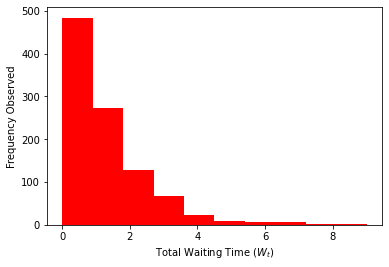

   i   t_enter       L_q  t_served       W_q    t_exit         W
   1      0.25         0      0.25      0.00      1.85      1.60
   2      0.30         1      1.85      1.55      2.42      2.12
   3      0.69         2      2.42      1.73      3.93      3.25
   4      1.73         3      3.93      2.21      5.06      3.34
   5      2.25         3      5.06      2.81      7.67      5.42
   6      3.82         3      7.67      3.86      9.62      5.81
   7      7.92         1      9.62      1.70      9.76      1.84
   8      9.81         0      9.81      0.00     10.46      0.65
   9     10.12         1     10.46      0.35     10.49      0.37
  10     10.59         0     10.59      0.00     11.46      0.87
  11     10.82         1     11.46      0.64     12.05      1.22
  12     11.20         2     12.05      0.84     12.16      0.96
  13     13.27         0     13.27      0.00     14.09      0.82
  14     16.59         0     16.59      0.00     16.93      0.34
  15     18.61         0 

In [31]:
# define the number of customers and sample inter-arrival and service durations
num_customers = 1000
x = [gen_t_arrival() for i in range(num_customers)]
y = [gen_t_service() for i in range(num_customers)]

# create arrays to store simulation results for each customer
t_enter = np.zeros(num_customers) # time entered
q_length = np.zeros(num_customers) # queue length on entry
t_served = np.zeros(num_customers) # time served
w_queue = np.zeros(num_customers) # waiting time in queue
t_exit = np.zeros(num_customers) # time exited
w_total = np.zeros(num_customers) # total waiting time

# loop over each customer
for i in range(num_customers):
    # entry time is appended to the previous entry time
    # or equal to arrival time for first customer
    t_enter[i] = t_enter[i-1] + x[i] if i > 0 else x[i]
    # queue length is the number of customers who have not yet exited
    # or zero for the first customer
    q_length[i] = np.sum(t_exit[0:i] > t_enter[i]) if i > 0 else 0
    # time served is the exit time of previous customer if in queue
    # or entry time if no queue
    t_served[i] = t_exit[i-1] if q_length[i] > 0 else t_enter[i]
    # waiting time in queue is service time minus entry time
    w_queue[i] = t_served[i]-t_enter[i]
    # exit time is time served plus service time
    t_exit[i] = t_served[i] + y[i]
    # total wait is exit time minus entry time
    w_total[i] = t_exit[i] - t_enter[i]

# print out some of the key summary statistics
print('L_q_bar = {:.2f}'.format(np.mean(q_length)))
print('W_q_bar = {:.2f}'.format(np.mean(w_queue)))
print('W_bar = {:.2f}'.format(np.mean(w_total)))

# plot a histogram of waiting time
plt.figure()
plt.hist(w_total, color='r')
plt.xlabel('Total Waiting Time ($W_t$)')
plt.ylabel('Frequency Observed')
plt.show()

# print out a table of the state and input trajectory
print('{:>4s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
        'i', 't_enter', 'L_q', 't_served', 'W_q', 't_exit', 'W'))
for i in range(num_customers):
    print('{:4d}{:10.2f}{:10.0f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(
            i+1, t_enter[i], q_length[i], t_served[i], 
            w_queue[i], t_exit[i], w_total[i]))